# Case Ifood
*Desenvolvido por Mário de Deus*

# Installs

In [1]:
#Jupyter Notebook
!pip install pandas-profiling --upgrade -q
!pip install pandas --upgrade -q

#Lime
!pip install lime -q
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 22.0 MB/s eta 0:00:00


# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import lime
import lime.lime_tabular
import shap

import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-b445dde728f3>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Descrição / Objetivo do problema

* O objetivo

O objetivo da equipe é construir um modelo preditivo que produzirá o maior lucro para a próxima campanha de marketing direto, programada para o próximo mês. A nova campanha, sexta, visa a venda de um novo gadget para clientes cadastrados no Banco de Dados da empresa. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para a aquisição do gadget. Durante os meses seguintes, os clientes que compraram a oferta foram devidamente etiquetados. O custo total da campanha da amostra foi de 6,720MU e a receita gerada pelos clientes que aceitaram a oferta foi de 3,674MU. Globalmente, a campanha teve um lucro de -3,046MU. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. Felizmente, o modelo permitirá que a empresa escolha a dedo os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.
Os dados
O conjunto de dados contém características sociodemográficas e firográficas de cerca de 2.240 clientes contatados. Além disso, contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.


# Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Google COlab
df = pd.read_csv('/content/drive/MyDrive/Automated_ML_and_Deploy/Aula02_20230217/data.csv',encoding='utf-8')

#Jupyter
#df = pd.read_csv('data.csv',encoding='utf-8')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

Drop da feature ID por ser um identificador

In [5]:
df.drop('ID',axis = 1, inplace = True, errors = 'ignore')
df.shape

(2240, 28)

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [6]:
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp2              2
AcceptedCmp1              2
Complain                  2
Teenhome                  3
Kidhome                   3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
dtype: int64

In [7]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True, errors = 'ignore')

## NaN analysis

In [8]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Somente a feature Income possui valores nulos.
Analisando as linhas com valores nulos em relação aos valores da feature target

In [9]:
#Distribuição da feature Response entre as amostras com Income = NaN
df[df.Income.isna()].Response.value_counts()

0    23
1     1
Name: Response, dtype: int64

In [10]:
# Proporção de 0 e 1 da fetaure Response no df completo
df.Response.value_counts(normalize = True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

In [11]:
print('% amostras com NaN: ',np.round((df.Income.isna().sum()/len(df))*100,2))
print('% amostras com NaN e Response = 1: ',
      np.round((( len(df[(df.Income.isna()) & (df.Response == 1)]) / len(df))*100),2))

% amostras com NaN:  1.07
% amostras com NaN e Response = 1:  0.04


Dado que as 24 linhas com valores Nan representam 1% do dataset total, e que entre as 24 linhas com Income == Nan somente uma apresentou Response == 1 (0.04%), as 24 linhas serão dropadas

In [12]:
print('Shape antes do dropna: ',df.shape[0])
df.dropna(axis=0,inplace = True)
print('Shape após o dropna: ',df.shape[0])

Shape antes do dropna:  2240
Shape após o dropna:  2216


## Ajuste do dtypes

In [13]:
df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.dtypes

Year_Birth                      Int64
Education                      string
Marital_Status                 string
Income                          Int64
Kidhome                         Int64
Teenhome                        Int64
Dt_Customer            datetime64[ns]
Recency                         Int64
MntWines                        Int64
MntFruits                       Int64
MntMeatProducts                 Int64
MntFishProducts                 Int64
MntSweetProducts                Int64
MntGoldProds                    Int64
NumDealsPurchases               Int64
NumWebPurchases                 Int64
NumCatalogPurchases             Int64
NumStorePurchases               Int64
NumWebVisitsMonth               Int64
AcceptedCmp3                    Int64
AcceptedCmp4                    Int64
AcceptedCmp5                    Int64
AcceptedCmp1                    Int64
AcceptedCmp2                    Int64
Complain                        Int64
Response                        Int64
dtype: objec

# Feature Engineering

## Idade dos clientes

In [14]:
from datetime import datetime
ano_atual = pd.datetime.now().year
df['Age'] = ano_atual - df.Year_Birth
df.drop('Year_Birth',axis = 1, inplace = True, errors = 'ignore')
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42


## Tempo como cliente

In [15]:
dt = pd.datetime.now().date()
df['Time_Customer'] = dt - pd.to_datetime(df['Dt_Customer']).dt.date
df['Time_Customer'] = df['Time_Customer'] / np.timedelta64(1, 'Y')
print(df[['Dt_Customer','Time_Customer']].head())
df.drop('Dt_Customer',axis = 1, inplace = True)

  Dt_Customer  Time_Customer
0  2012-09-04      10.472494
1  2014-03-08       8.966645
2  2013-08-21       9.511489
3  2014-02-10       9.037831
4  2014-01-19       9.098065


## Estatística Básica

### Variáveis Numéricas

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.0,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.0,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0
MntWines,2216.0,305.091606,337.32792,0.0,24.0,174.5,505.0,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.0,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.0,321.0


### Variáveis Categóricas

In [17]:
df.describe(include = 'string')

,Education,Marital_Status
count,2216,2216
unique,5,8
top,Graduation,Married
freq,1116,857


In [18]:
df.Education.value_counts(normalize = True)

Graduation     0.50361
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: Education, dtype: Float64

In [19]:
df.Marital_Status.value_counts(normalize = True)

Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: Float64

### Removendo valores incoerentes com a variável Marital_Status

In [20]:
index_to_drop = df[(df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd') | (df['Marital_Status'] =='absurd') | (df['Marital_Status'] == 'Alone')].index
df.drop(index_to_drop,inplace = True)
df = df.reset_index(drop = True)
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: Marital_Status, dtype: Int64

In [21]:
df.rename(columns={'Response':'z_Response'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns={'z_Response':'Response'},inplace = True)

df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer', 'Response'],
      dtype='object')

# EDA utilizando Pandas Profiling

In [ ]:
profile = ProfileReport(df, title='Case Ifood Report')
profile

In [ ]:
df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer', 'Response'],
      dtype='object')

## Quantidade de response =0 ou =1 entre cada variável categórica

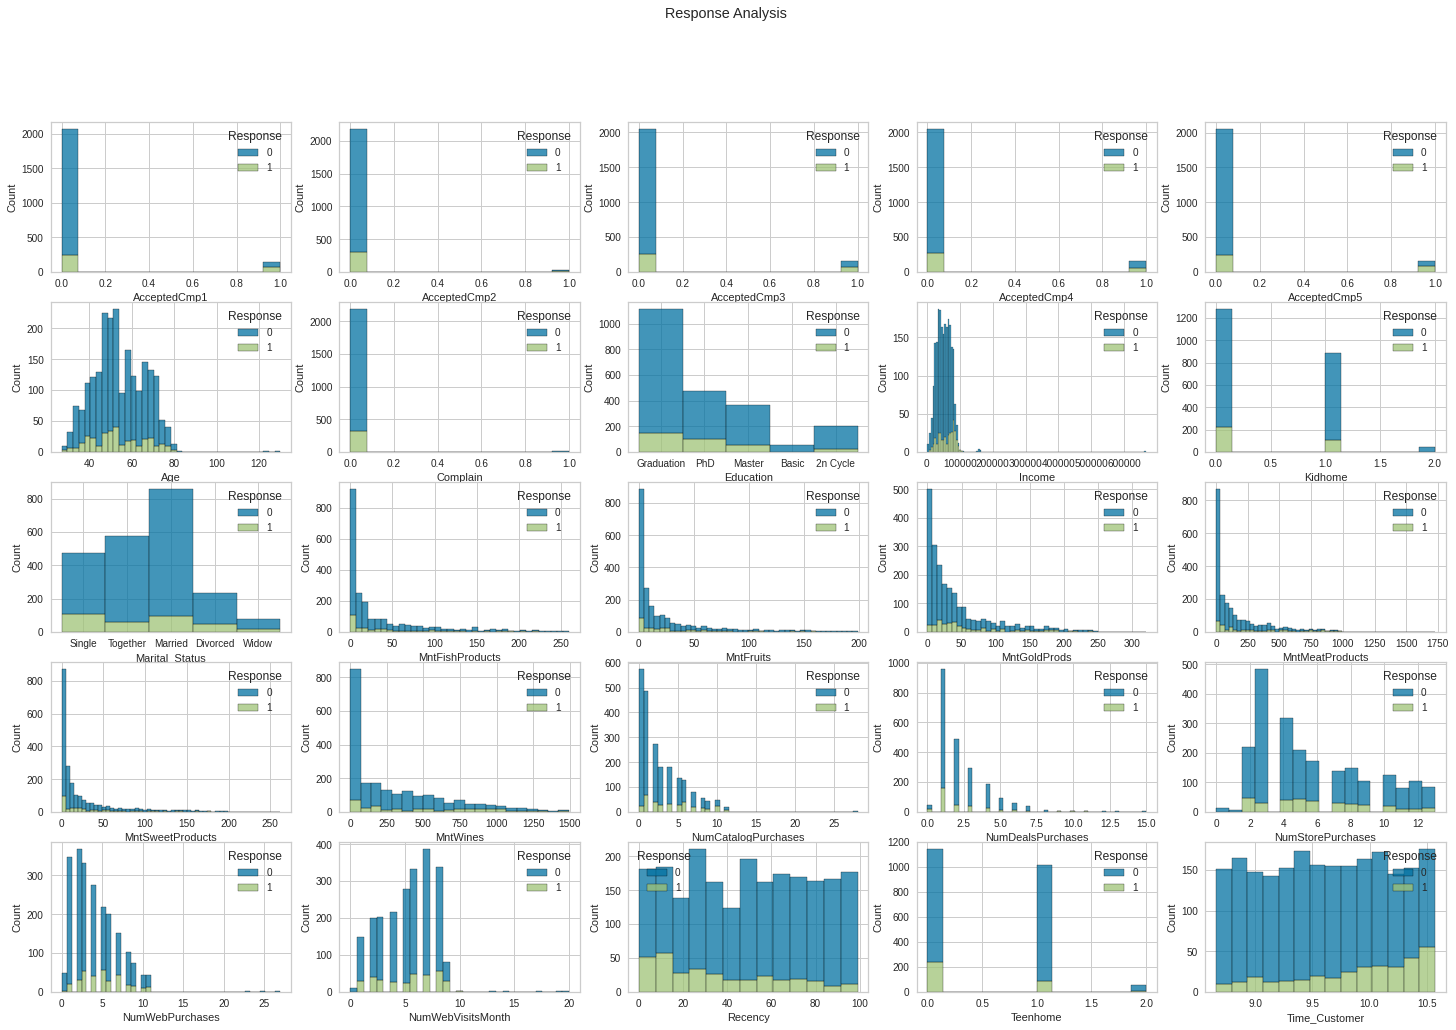

In [ ]:
columns = df.columns
fig, axes = plt.subplots(5, 5, figsize=(25, 16), sharey=False)
fig.suptitle('Response Analysis')

feature=0
for row in range(0,5):
  for col in range(0,5):
    sns.histplot(ax=axes[row, col], data=df, x=cols[feature], hue="Response", multiple="stack")
    feature += 1

## Proporção (relativa) de response=0 e response = 1 entre cada variável categórica

### Separando o dataset em dois: Response ==0 e ==1

In [ ]:
df0 = df[df.Response == 0]
df1 = df[df.Response == 1]

### Separando o dataset em dois: Response ==0 e ==1

In [ ]:
cols_cat = ['Complain','Education','Kidhome','Marital_Status','Teenhome',
            'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']
for x in cols_cat:
  print(x)
  print(f'Resp 0\n{df0[x].value_counts(normalize = True)}\n')
  print(f'Resp 1\n{df1[x].value_counts(normalize = True)}\n')
  print('#'*50)

Complain
Resp 0
0    0.99042
1    0.00958
Name: Complain, dtype: Float64

Resp 1
0    0.990909
1    0.009091
Name: Complain, dtype: Float64

##################################################
Education
Resp 0
Graduation    0.512507
PhD           0.201703
Master        0.163385
2n Cycle      0.094731
Basic         0.027674
Name: Education, dtype: Float64

Resp 1
Graduation    0.457576
PhD                0.3
Master        0.169697
2n Cycle      0.066667
Basic         0.006061
Name: Education, dtype: Float64

##################################################
Kidhome
Resp 0
0     0.56413
1    0.412453
2    0.023417
Name: Kidhome, dtype: Float64

Resp 1
0    0.663636
1    0.330303
2    0.006061
Name: Kidhome, dtype: Float64

##################################################
Marital_Status
Resp 0
Married     0.403938
Together    0.273018
Single      0.194252
Divorced    0.097924
Widow       0.030867
Name: Marital_Status, dtype: Float64

Resp 1
Single      0.321212
Married      0.29697
Toge

In [ ]:
df0 = df[df.Response == 0]
df1 = df[df.Response == 1]

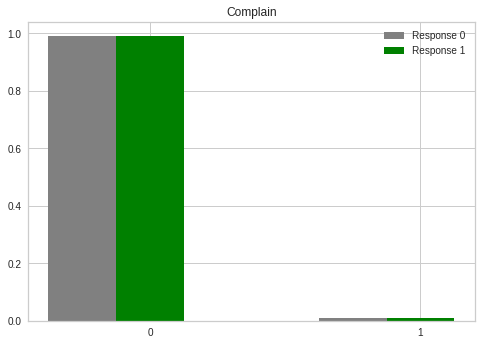

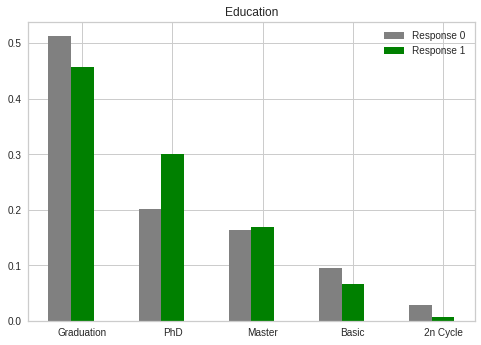

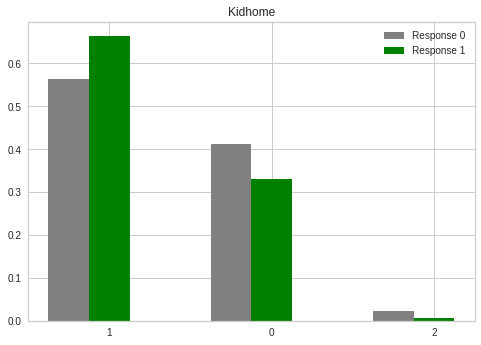

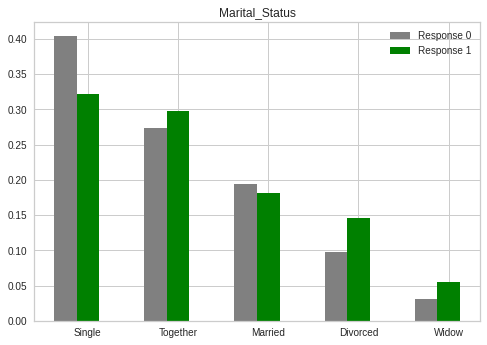

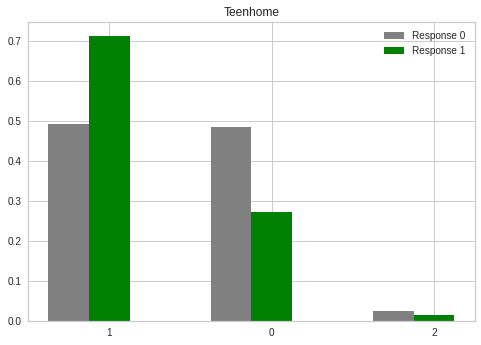

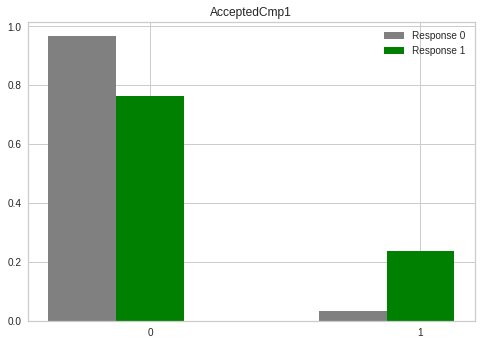

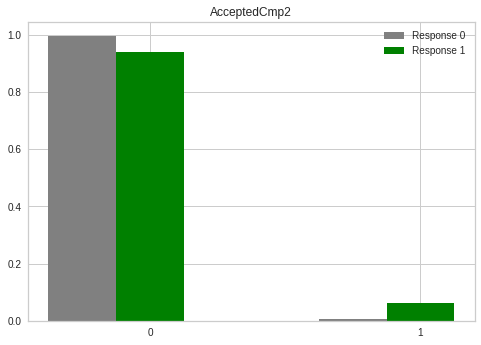

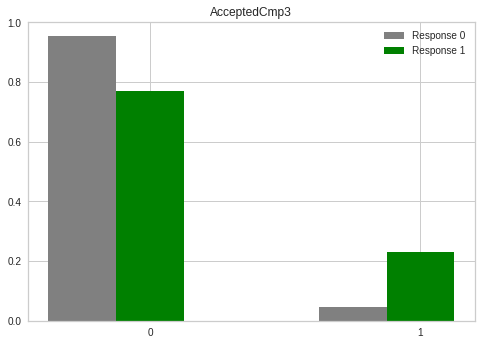

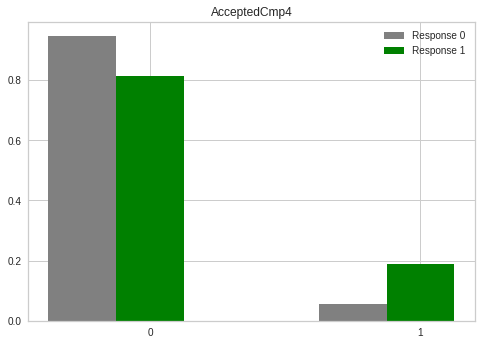

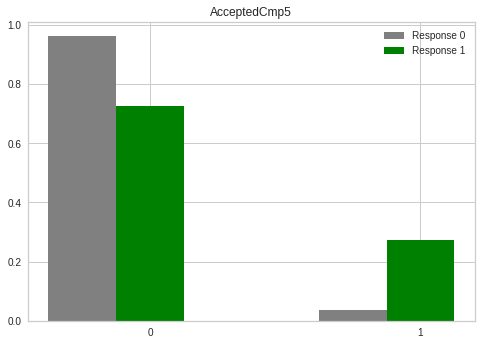

In [ ]:
for x in cols_cat:
  x1 = df0[x].unique()
  x2 = df1[x].unique()
  y1 = df0[x].value_counts(normalize = True)
  y2 = df1[x].value_counts(normalize = True)

  # set width of bar
  barWidth = 0.25

  # Set position of bar on X axis
  pos1 = np.arange(len(y1))
  pos2 = [x + barWidth for x in pos1]

  # Make the plot
  plt.title (f'{x}')
  plt.bar(pos1, y1, color='grey', width=barWidth, label='Response 0')
  plt.bar(pos2, y2, color='green', width=barWidth, label='Response 1')
  
  # Add xticks on the middle of the group bars
  plt.xticks([i + barWidth for i in range(len(df0[x].unique()))], df0[x].unique())

  # Create legend & Show graphic
  plt.legend()
  plt.show()
  np.arange(len(df0[x].unique()))
  print('')

# Análise de Perfil dos Clientes com maior tendencia a conversão

Breve análise sobre o perfil dos clientes que converteram na Campanha #6 (Response = 1):
1. Entre os Complain 0/1 não há diferença siginificativa em termos de conversão;
2. Em relação a Educação, a conversão foi maior entre aqueles que possuem PhD;
3. Maior conversão entre aqueles que têm 1 criança ou 1 adolescente em casa;
4. Maior conversão entre aqueles que declararam estado civil "Together", "Divorciado" e "Viúvos".
5. Maior conversão entre os que aceitaram a oferta em pelo menos uma das 5 campanhas anteriores


## Preparação do dataset para Modelagem

## Dummizando as features categoricas

In [22]:
X = df.drop('Response', axis = 1)
y = df['Response']

cols_string = X.select_dtypes(include = 'string').columns

X = pd.get_dummies(X, columns = cols_string, drop_first = True).convert_dtypes()
X.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Income,Kidhome,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0,0,0,0,0,66,0,58138,0,172,88,88,546,88,635,10,3,4,8,7,58,0,10.472494,0,1,0,0,0,1,0,0
1,0,0,0,0,0,69,0,46344,1,2,1,6,6,1,11,1,2,2,1,5,38,1,8.966645,0,1,0,0,0,1,0,0
2,0,0,0,0,0,58,0,71613,0,111,49,42,127,21,426,2,1,10,8,4,26,0,9.511489,0,1,0,0,0,0,1,0
3,0,0,0,0,0,39,0,26646,1,10,4,5,20,3,11,0,2,4,2,6,26,0,9.037831,0,1,0,0,0,0,1,0
4,0,0,0,0,0,42,0,58293,1,46,43,15,118,27,173,3,5,6,5,5,94,0,9.098065,0,0,0,1,1,0,0,0



## Train Test Split

In [23]:
# Train Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(1546, 31)
(1546,)
(663, 31)
(663,)


* A partir daqui serão testados diferentes modelos com diferentes combinações de hiperparâmetros para verificar qual apresenta melhor métrica de classificação. 
**Para o problema de negócio em questão, a métrica Precision é a mais relevante, no entanto, afim de eleger o melhor modelo independentemente do treshold definido, será considerado o AUC como métrica principal.**

In [24]:
modelo = []
precisao = []
recall = []
auc = []
df_comp = pd.DataFrame({'modelo': modelo, 'precisao':precisao, 'recall':recall, 'auc': auc})


def append_tab(ytest, ypred):
  '''
  Função para inserir métricas de classificação de cada modelo testado 
  em uma tabela comparativa, ordenada pelo maior AUC.

  ARGS:
  ytest: valores reais da feature target ('Response') armazenadas no objeto ytest
  ypred: valores preditos pelo ML para a feature target ('Response') armazenadas no objeto ypred
  '''
  global modelo
  global precisao
  global recall
  global auc
  global df_comp

  modelo.append(mod)
  precisao.append(precision_score(ytest, ypred))
  recall.append(recall_score(ytest, ypred))
  auc.append(roc_auc_score(ytest, ypred))
  df_comp = pd.DataFrame({'modelo': modelo, 
                        'auc': auc,
                        'precisao': precisao, 
                        'recall': recall
                        })
  df_comp = df_comp.sort_values('auc', ascending = False)
  return df_comp  
    

# MODELO 1 - DECISION TREE

## DT - Sem balanceamento e Sem pruning

In [27]:
%%time
#instanciando o modelo 
mdl_dt = DecisionTreeClassifier()

#treinando o modelo
mdl_dt.fit(Xtrain, ytrain)

#predict
ypred_dt_train = mdl_dt.predict(Xtrain)
ypred_dt_test = mdl_dt.predict(Xtest)

#metricas
print('Predict no df_train:')
print(classification_report(ytrain, ypred_dt_train))
print('\nPredict no df_test:')
print(classification_report(ytest, ypred_dt_test))

#Alimentando a tabela comparativa
mod = 'DT - Sem balanceamento, Sem pruning'
df_comp = append_tab(ytest, ypred_dt_test)
display(df_comp)

Predict no df_train:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1315
           1       1.00      0.96      0.98       231

    accuracy                           0.99      1546
   macro avg       1.00      0.98      0.99      1546
weighted avg       0.99      0.99      0.99      1546


Predict no df_test:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       564
           1       0.45      0.49      0.47        99

    accuracy                           0.84       663
   macro avg       0.68      0.70      0.69       663
weighted avg       0.84      0.84      0.84       663



,modelo,auc,precisao,recall
1,"DT - Sem balanceamento, Sem pruning",0.695170,0.453704,0.494949
0,"DT - Sem balanceamento, Sem pruning",0.675236,0.453608,0.444444


CPU times: user 53.2 ms, sys: 169 µs, total: 53.3 ms
Wall time: 60.8 ms


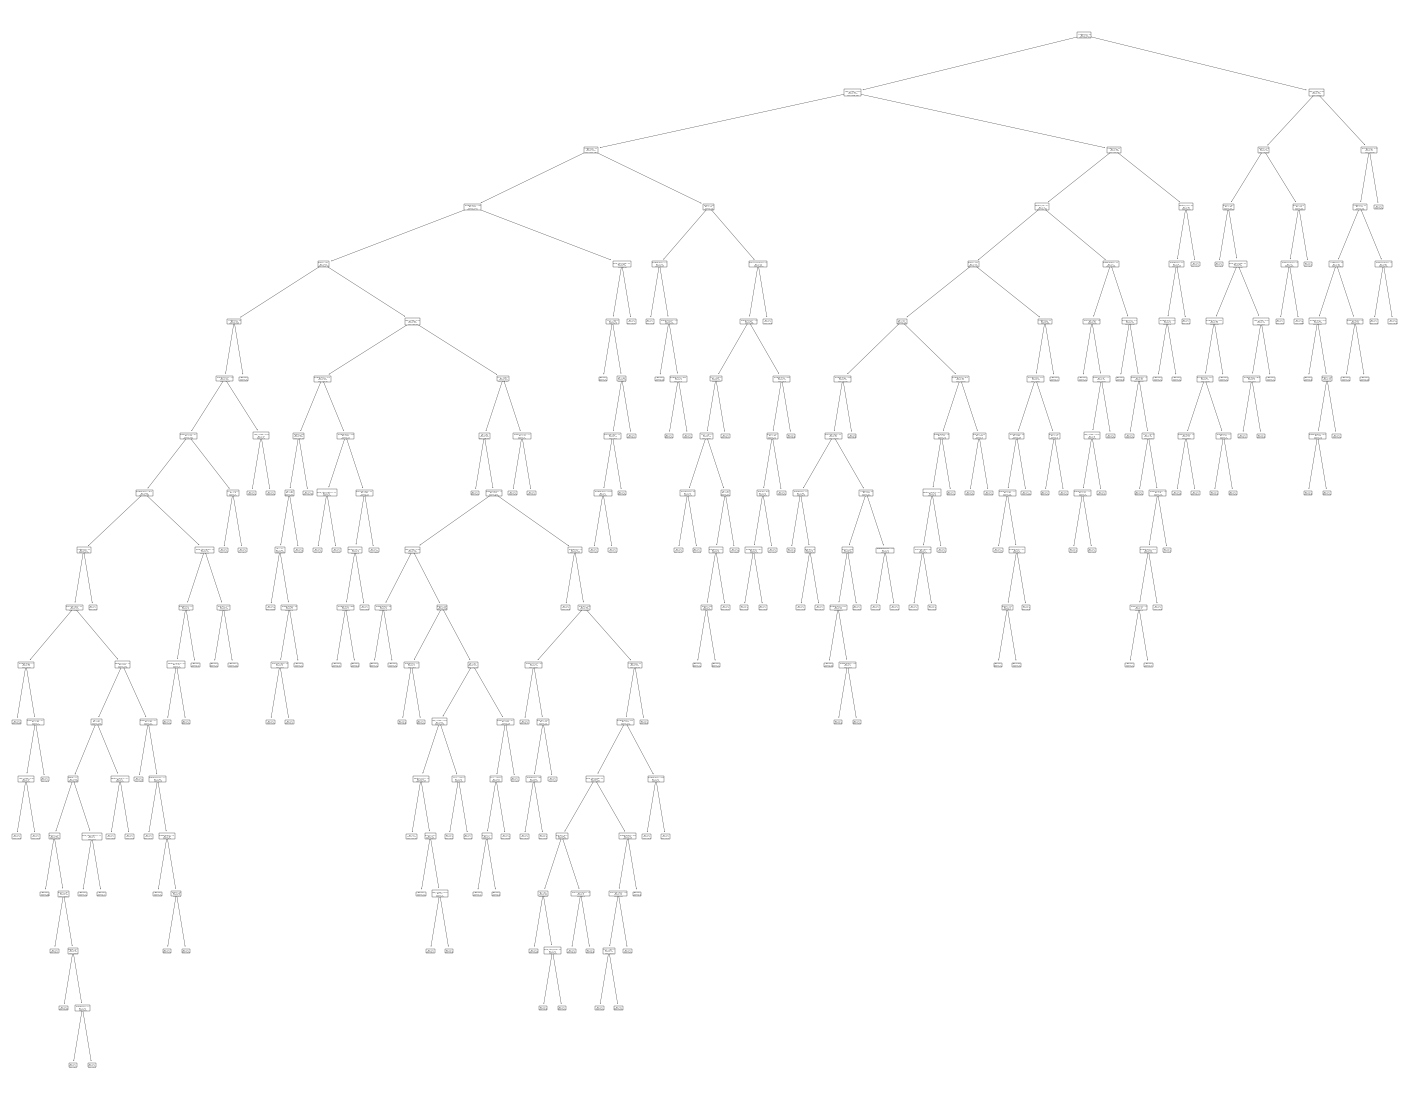

In [ ]:
#Este primeiro modelo apresenta claros sinais de overfitting, já que a precisao no treino foi = 1.0 e no test = 0.47.
#Isso ocorreu por não especificarmos qualquer hiperparametro, permmitindo que a árvore gerasse nós até a ultima amostra ser explicada

#gerando um plot tree
fig = plt.figure(figsize = (25,20))
tree.plot_tree(mdl_dt, feature_names = Xtrain.columns);

## DT - Com balanceamento por SMOTE e Sem pruning

In [28]:
#Antes do balanceamento
print('Antes do balanceamento: \n',ytrain.value_counts())

#Balanceamento
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(Xtrain.astype(np.float64), ytrain.astype(np.float64))
print('Após o balanceamento: \n', pd.Series(y_res).value_counts())

Antes do balanceamento: 
 0    1315
1     231
Name: Response, dtype: int64
Após o balanceamento: 
 0.0    1315
1.0    1315
Name: Response, dtype: int64


In [29]:
#instanciando o modelo 
mdl_dt = DecisionTreeClassifier(random_state = 42)

#treinando o modelo
mdl_dt.fit(X_res, y_res)

#predict
ypred_dt = mdl_dt.predict(Xtest)

#Alimentando a tabela comparativa
mod = 'DT - Balanceamento SMOTE, Sem pruning'
df_comp = append_tab(ytest, ypred_dt)
display(df_comp)

,modelo,auc,precisao,recall
2,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
1,"DT - Sem balanceamento, Sem pruning",0.695170,0.453704,0.494949
0,"DT - Sem balanceamento, Sem pruning",0.675236,0.453608,0.444444


## DT - Com balanceamento por class_weight do Sklearn e Sem pruning

In [30]:
%%time
#instanciando o modelo 
mdl_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)

#treinando o modelo
mdl_dt.fit(Xtrain, ytrain)

#predict
ypred_dt = mdl_dt.predict(Xtest)

#Alimentando a tabela comparativa
mod = 'DT - Balanceamento class_weight, Sem pruning'
df_comp = append_tab(ytest, ypred_dt)
display(df_comp)

,modelo,auc,precisao,recall
2,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
1,"DT - Sem balanceamento, Sem pruning",0.695170,0.453704,0.494949
0,"DT - Sem balanceamento, Sem pruning",0.675236,0.453608,0.444444
3,"DT - Balanceamento class_weight, Sem pruning",0.667258,0.415094,0.444444


CPU times: user 37.7 ms, sys: 775 µs, total: 38.4 ms
Wall time: 40.7 ms


## DT - Pruning por Max_Depth e Balanceamento por class_weight

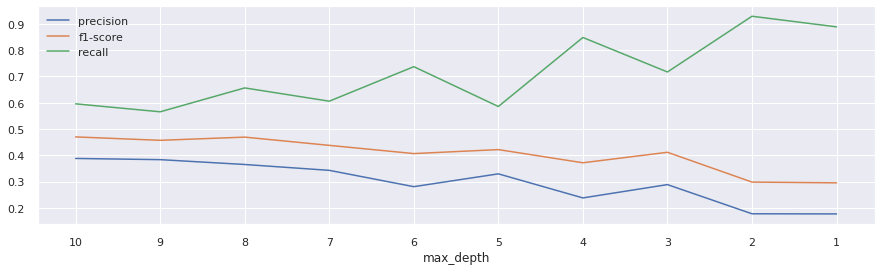

In [31]:
i = []
precision = []
fs = []
recall_ = []


for x in range(10,0,-1):
  #instanciando o modelo 
  mdl_dt = DecisionTreeClassifier(max_depth = x, class_weight = 'balanced', random_state = 42)
  #treinando o modelo
  mdl_dt.fit(Xtrain, ytrain)
  #predict
  ypred_dt = mdl_dt.predict(Xtest)
  i.append(str(x))
  fs.append(f1_score(ytest, ypred_dt, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_dt, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_dt, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='max_depth')
plt.show();


**A max depth com métricas mais consistentes foi = 10**

---



In [36]:
%%time
#baseado no gráfico o melhor max_depth é 10
mdl_dt = DecisionTreeClassifier(max_depth = 10, class_weight = 'balanced', random_state = 42)
#treinando o modelo
mdl_dt.fit(Xtrain, ytrain)
#predict
ypred_dt = mdl_dt.predict(Xtest)

#Alimentando a tabela comparativa
mod = 'DT - Balanceamento class_weight, Max_depth = 10'
df_comp = append_tab(ytest, ypred_dt)
display(df_comp)

,modelo,auc,precisao,recall
5,"DT - Balanceamento class_weight, Max_depth = 9",0.715533,0.388158,0.595960
6,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
8,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
4,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
2,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
1,"DT - Sem balanceamento, Sem pruning",0.695170,0.453704,0.494949
7,"DT - Balanceamento class_weight, Max_depth = 13",0.683914,0.421053,0.484848
0,"DT - Sem balanceamento, Sem pruning",0.675236,0.453608,0.444444
3,"DT - Balanceamento class_weight, Sem pruning",0.667258,0.415094,0.444444


CPU times: user 30.9 ms, sys: 0 ns, total: 30.9 ms
Wall time: 35.3 ms


## DT - Pruning por Max_Depth e Balanceamento por SMOTE

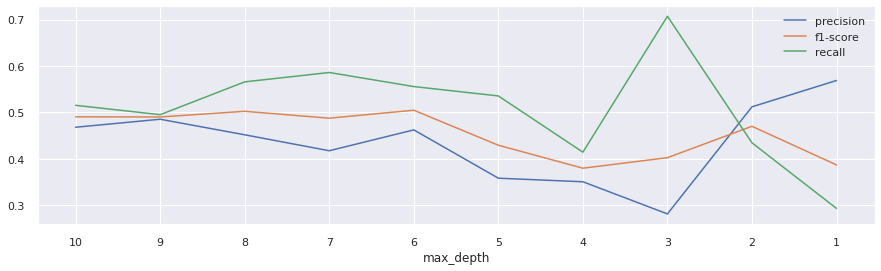

In [37]:
i = []
precision = []
fs = []
recall_ = []

for x in range(10,0,-1):
  #instanciando o modelo 
  mdl_dt = DecisionTreeClassifier(max_depth = x, random_state = 42)
  #treinando o modelo
  mdl_dt.fit(X_res, y_res)
  #predict
  ypred_dt = mdl_dt.predict(Xtest)
  i.append(str(x))
  fs.append(f1_score(ytest, ypred_dt, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_dt, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_dt, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='max_depth');

**A max depth com métricas mais consistentes foi = 6**

In [38]:
%%time
#baseado no gráfico o melhor max_depth é 6
mdl_dt = DecisionTreeClassifier(max_depth = 6, random_state = 42)
#treinando o modelo
mdl_dt.fit(X_res, y_res)
#predict
ypred_dt = mdl_dt.predict(Xtest)

#Alimentando a tabela comparativa
mod = 'DT - Balanceamento SMOTE, Max_depth = 6'
df_comp = append_tab(ytest, ypred_dt)
display(df_comp)

,modelo,auc,precisao,recall
9,"DT - Balanceamento SMOTE, Max_depth = 6",0.721040,0.462185,0.555556
5,"DT - Balanceamento class_weight, Max_depth = 9",0.715533,0.388158,0.595960
6,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
8,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
4,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
2,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
1,"DT - Sem balanceamento, Sem pruning",0.695170,0.453704,0.494949
7,"DT - Balanceamento class_weight, Max_depth = 13",0.683914,0.421053,0.484848
0,"DT - Sem balanceamento, Sem pruning",0.675236,0.453608,0.444444
3,"DT - Balanceamento class_weight, Sem pruning",0.667258,0.415094,0.444444


CPU times: user 37.3 ms, sys: 0 ns, total: 37.3 ms
Wall time: 39.6 ms


## DT - Pruning por Min_Samples_Leaf e Balanceamento por class_weight

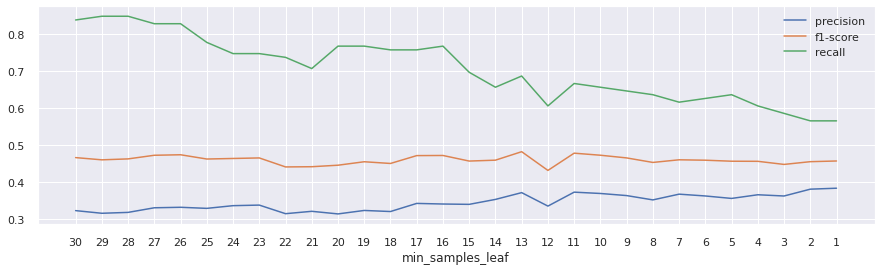

In [39]:
i = []
precision = []
fs = []
recall_ = []


for x in range(30,0,-1):
  #instanciando o modelo 
  mdl_dt = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = x, class_weight = 'balanced', random_state = 42)
  #treinando o modelo
  mdl_dt.fit(Xtrain, ytrain)
  #predict
  ypred_dt = mdl_dt.predict(Xtest)
  i.append(str(x))
  fs.append(f1_score(ytest, ypred_dt, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_dt, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_dt, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='min_samples_leaf');

Mean Samples Leaf com metricas mais consistentes foi = 11

In [40]:
%%time
#baseado no gráfico o melhor min_samples_leaf = 5
mdl_dt = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 11, class_weight = 'balanced', random_state = 42)
#treinando o modelo
mdl_dt.fit(Xtrain, ytrain)
#predict
ypred_dt = mdl_dt.predict(Xtest)

#Alimentando a tabela comparativa
mod = 'DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 11'
df_comp = append_tab(ytest, ypred_dt)
display(df_comp)

,modelo,auc,precisao,recall
10,"DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 11",0.734929,0.372881,0.666667
9,"DT - Balanceamento SMOTE, Max_depth = 6",0.721040,0.462185,0.555556
5,"DT - Balanceamento class_weight, Max_depth = 9",0.715533,0.388158,0.595960
6,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
8,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
4,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
2,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
1,"DT - Sem balanceamento, Sem pruning",0.695170,0.453704,0.494949
7,"DT - Balanceamento class_weight, Max_depth = 13",0.683914,0.421053,0.484848
0,"DT - Sem balanceamento, Sem pruning",0.675236,0.453608,0.444444


CPU times: user 31.5 ms, sys: 617 µs, total: 32.1 ms
Wall time: 33.2 ms


## DT - Pruning por Min_Samples_Leaf e Balanceamento por SMOTE

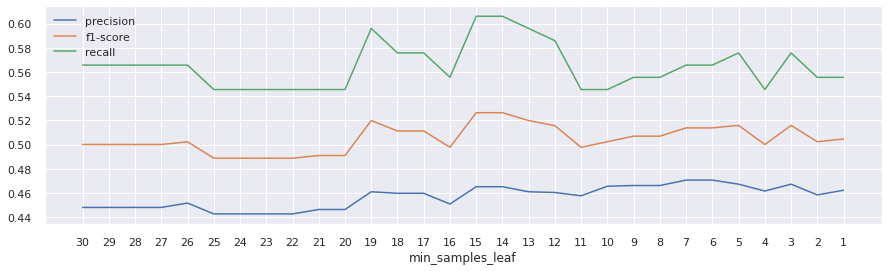

In [41]:
i = []
precision = []
fs = []
recall_ = []


for x in range(30,0,-1):
  #instanciando o modelo 
  mdl_dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = x, random_state = 42)
  #treinando o modelo
  mdl_dt.fit(X_res, y_res)
  #predict
  ypred_dt = mdl_dt.predict(Xtest)
  i.append(str(x))
  fs.append(f1_score(ytest, ypred_dt, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_dt, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_dt, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='min_samples_leaf');


Mean Samples Leaf com metricas mais consistentes foi = 5

In [42]:
%%time
#baseado no gráfico o melhor min_samples_leaf = 5
mdl_dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 15,  random_state = 42)
#treinando o modelo
mdl_dt.fit(X_res, y_res)
#predict
ypred_dt = mdl_dt.predict(Xtest)

#Alimentando a tabela comparativa
mod = 'DT - Balanceamento SMOTE, Max_depth = 6, min_samples_leaf = 5'
df_comp = append_tab(ytest, ypred_dt)
display(df_comp)

,modelo,auc,precisao,recall
11,"DT - Balanceamento SMOTE, Max_depth = 6, min_samples_leaf = 5",0.741860,0.465116,0.606061
10,"DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 11",0.734929,0.372881,0.666667
9,"DT - Balanceamento SMOTE, Max_depth = 6",0.721040,0.462185,0.555556
5,"DT - Balanceamento class_weight, Max_depth = 9",0.715533,0.388158,0.595960
6,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
8,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
4,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
2,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
1,"DT - Sem balanceamento, Sem pruning",0.695170,0.453704,0.494949
7,"DT - Balanceamento class_weight, Max_depth = 13",0.683914,0.421053,0.484848


CPU times: user 35.5 ms, sys: 792 µs, total: 36.3 ms
Wall time: 39 ms


## Melhor Tuning: DT - Pruning por Max_Depth = 6 e Balanceamento por SMOTE

**Após a definição dos melhores parametros de Pruning e Balanceamento, abaixo será verificado o melhor Treshold**

## DT - Análise de Treshold

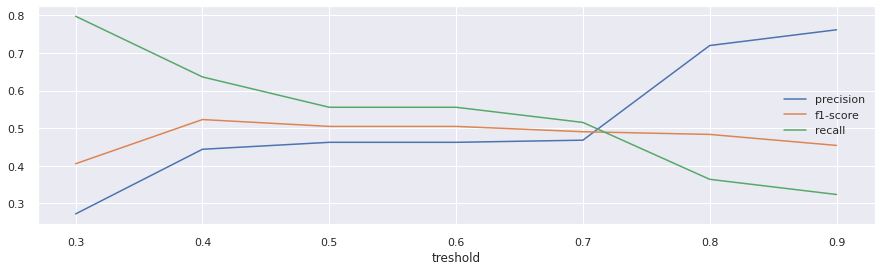

In [43]:
i = []
precision = []
fs = []
recall_ = []

for x in range(3, 10):
  #instanciando o modelo 
  mdl_dt = DecisionTreeClassifier(max_depth = 6, random_state = 42)
  #treinando o modelo
  mdl_dt.fit(X_res, y_res)
  #predict
  ypred_dt = (mdl_dt.predict_proba(Xtest)[:,1] >= (x/10)).astype(bool)
  i.append(str(x/10))
  fs.append(f1_score(ytest, ypred_dt, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_dt, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_dt, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='treshold');

### Matriz de Confusão

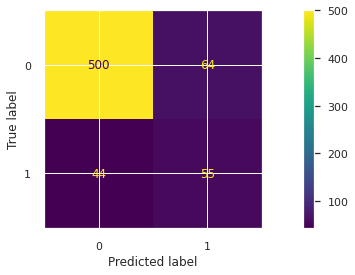

In [44]:
plot_confusion_matrix(mdl_dt, Xtest, ytest)  
plt.show()

### Curva ROC

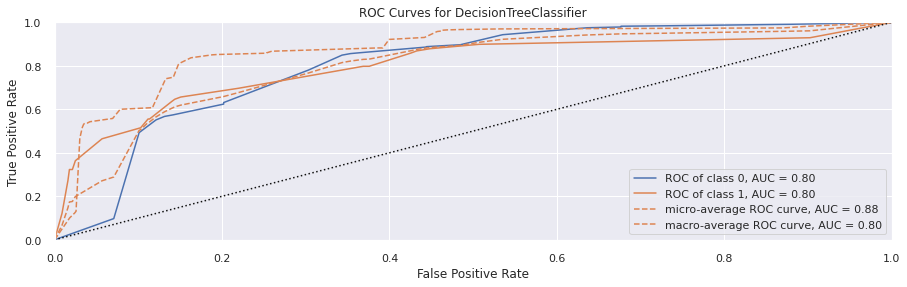

In [45]:
visualizer = ROCAUC(mdl_dt, classes=[0,1])

visualizer.fit(Xtrain, ytrain)        # Fit the training data to the visualizer
visualizer.score(Xtest, ytest)        # Evaluate the model on the test data
visualizer.show(); 

## DT | Conclusões

* Balanceamento - método ideal: SMOTE (oversampling)
* Prunning ideal: por max_depth = 6
* Min_samples_leaf = 5

In [ ]:
display(df_comp)

,modelo,auc,precisao,recall
6,"DT - Balanceamento SMOTE, Max_depth = 6, min_samples_leaf = 5",0.741860,0.465116,0.606061
5,"DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 11",0.734929,0.372881,0.666667
4,"DT - Balanceamento SMOTE, Max_depth = 6",0.721040,0.462185,0.555556
3,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
1,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
0,"DT - Sem balanceamento, Sem pruning",0.689233,0.444444,0.484848
2,"DT - Balanceamento class_weight, Sem pruning",0.667258,0.415094,0.444444


# MODELO 2 - RANDOM FOREST CLASSIFIER

## RFC Sem balanceamento

In [48]:
n_estimators = [10,30,100,500,1000]
max_features = ['auto', 'sqrt']
max_depth = [5,15,30,50]
#min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,5,10]
bootstrap = ['True','False']
class_weight = ['balanced', None]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               #'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

rfc = RandomForestClassifier()
rfc_tuned = RandomizedSearchCV(estimator = rfc,
                               param_distributions = random_grid,
                               n_iter = 100, 
                               cv = 3,
                               verbose = 2,
                               n_jobs = -1,
                               random_state = 42)
mdl_rfc = rfc_tuned.fit(Xtrain, ytrain)
print(rfc_tuned.best_params_)

ypred_rfc = mdl_rfc.predict(Xtest)

#Alimentando a tabela comparativa
mod = 'RFR - Sem Balanceamento - Randomized Search CV'
df_comp = append_tab(ytest, ypred_rfc)
display(df_comp)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 500, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': 'balanced', 'bootstrap': 'True'}


,modelo,auc,precisao,recall
11,"DT - Balanceamento SMOTE, Max_depth = 6, min_samples_leaf = 5",0.741860,0.465116,0.606061
10,"DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 11",0.734929,0.372881,0.666667
9,"DT - Balanceamento SMOTE, Max_depth = 6",0.721040,0.462185,0.555556
5,"DT - Balanceamento class_weight, Max_depth = 9",0.715533,0.388158,0.595960
6,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
8,"DT - Balanceamento class_weight, Max_depth = 10",0.715533,0.388158,0.595960
4,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
2,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
1,"DT - Sem balanceamento, Sem pruning",0.695170,0.453704,0.494949
7,"DT - Balanceamento class_weight, Max_depth = 13",0.683914,0.421053,0.484848


### Treshold

In [47]:
i = []
precision = []
fs = []
recall_ = []

for x in range(3, 10):
 
  #predict
  ypred_rfc = mdl_rfc.predict(Xtest)
  ypred_rfc = (mdl_rfc.predict_proba(Xtest)[:,1] >= (x/10)).astype(bool)
  i.append(str(x/10))
  fs.append(f1_score(ytest, ypred_rfc, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_rfc, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_rfc, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='treshold');

NameError: ignored

Mantido treshold default = 0.5 para evitar penalizar significativamente a metrica recall

### Matriz de Confusão

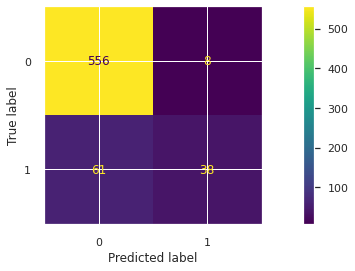

In [ ]:
plot_confusion_matrix(mdl_rfc, Xtest, ytest)  
plt.show()

### Curva ROC_AUC

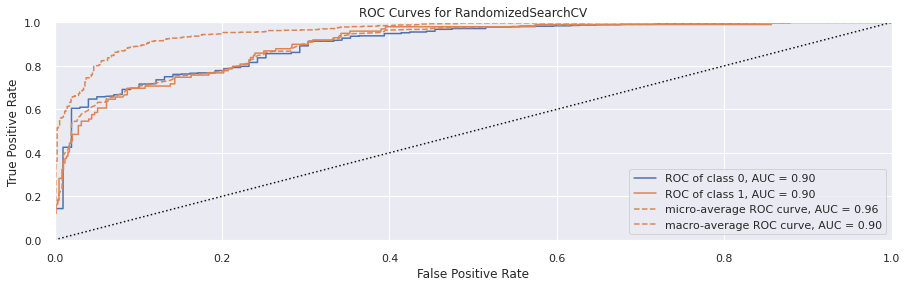

In [ ]:
visualizer = ROCAUC(mdl_rfc, classes=[0,1])

visualizer.fit(Xtrain, ytrain)        # Fit the training data to the visualizer
visualizer.score(Xtest, ytest)        # Evaluate the model on the test data
visualizer.show();

## RFC - Com balanceamento por SMOTE

In [ ]:
n_estimators = [10,30,100,500,1000]
max_features = ['auto', 'sqrt']
max_depth = [5,15,30,50]
#min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,5,10]
bootstrap = ['True','False']
class_weight = ['balanced', None]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               #'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

rfc = RandomForestClassifier()
rfc_tuned = RandomizedSearchCV(estimator = rfc,
                               param_distributions = random_grid,
                               n_iter = 100, 
                               cv = 3,
                               verbose = 2,
                               n_jobs = -1,
                               random_state = 42)
mdl_rfc_res = rfc_tuned.fit(X_res, y_res)
print(rfc_tuned.best_params_)

ypred_rfc = mdl_rfc_res.predict(Xtest)

#Alimentando a tabela comparativa
mod = 'RFR - Com Balanceamento por SMOTE - Randomized Search CV'
df_comp = append_tab(ytest, ypred_rfc)
display(df_comp)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 15, 'class_weight': None, 'bootstrap': 'False'}


,modelo,auc,precisao,recall
7,RFR - Com Balanceamento por SMOTE - Randomized Search CV,0.755265,0.791045,0.535354
5,"DT - Balanceamento SMOTE, Max_depth = 6, min_samples_leaf = 15",0.741860,0.465116,0.606061
4,"DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 9",0.723942,0.363636,0.646465
3,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
1,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
6,RFR - Sem Balanceamento - Randomized Search CV,0.684827,0.826087,0.383838
0,"DT - Sem balanceamento, Sem pruning",0.668413,0.438776,0.434343
2,"DT - Balanceamento class_weight, Sem pruning",0.667258,0.415094,0.444444


### Treshold

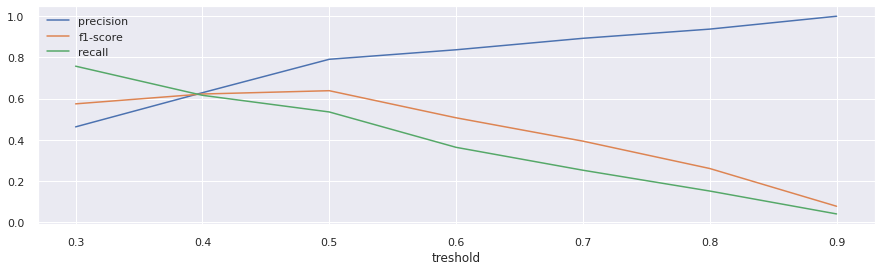

In [ ]:
i = []
precision = []
fs = []
recall_ = []

for x in range(3, 10):
 
  #predict
  ypred_rfc = mdl_rfc_res.predict(Xtest)
  ypred_rfc = (mdl_rfc_res.predict_proba(Xtest)[:,1] >= (x/10)).astype(bool)
  i.append(str(x/10))
  fs.append(f1_score(ytest, ypred_rfc, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_rfc, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_rfc, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='treshold');

Mantido treshold default = 0.5 para evitar penalizar significativamente a metrica recall

### Matriz de Confusão

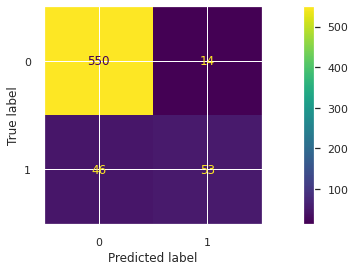

In [ ]:
plot_confusion_matrix(mdl_rfc_res, Xtest, ytest)
plt.show()

### Curva ROC_AUC

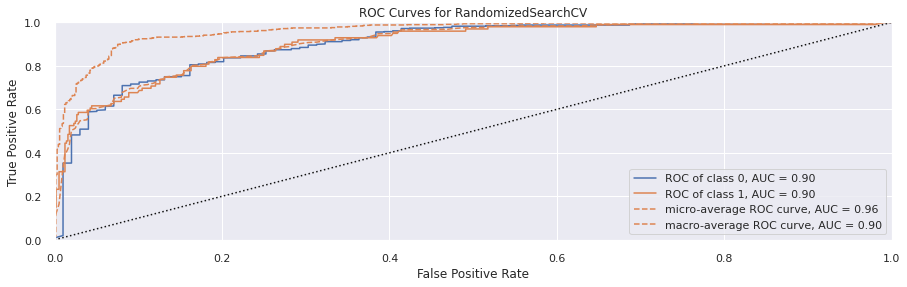

In [ ]:
visualizer = ROCAUC(mdl_rfc_res, classes=[0,1])

visualizer.fit(X_res, y_res)       # Fit the training data to the visualizer
visualizer.score(Xtest, ytest)        # Evaluate the model on the test data
visualizer.show();

# MODELO 3 - LGBM

## LGBM - Sem Balanceamento

In [ ]:
random_grid = {'num_leaves': [27, 30, 50, 80, 120, 170, 230, 300], 
               'bagging_fraction': [0.5, 0.7, 0.8, 0.9],
              'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
              'boosting_type' : ['gbdt', 'dart'],
              'bagging_freq': [3, 9, 11, 15, 17, 23, 31],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],       
              'feature_fraction': [0.5, 0.7, 0.8, 0.9],
              'lambda_l1': [0, 10, 20, 30, 40],
               'class_weight': ['balanced',None]} 

lgbm = LGBMClassifier()
lgbm_tuned = RandomizedSearchCV(estimator = lgbm,
                                param_distributions = random_grid,
                                n_iter = 100, cv = 2, 
                                verbose=10, random_state=42, n_jobs = -1)
mdl_lgbm = lgbm_tuned.fit(Xtrain.to_numpy(), ytrain.to_numpy())
print(lgbm_tuned.best_params_)
ypred_lgbm = mdl_lgbm.predict(Xtest.to_numpy())

#Alimentando a tabela comparativa
mod = 'LGBM - Sem Balanceamento - Randomized Search CV'
df_comp = append_tab(ytest, ypred_lgbm)
display(df_comp)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
{'num_leaves': 80, 'max_depth': 6, 'learning_rate': 0.3, 'lambda_l1': 0, 'feature_fraction': 0.8, 'class_weight': None, 'boosting_type': 'dart', 'bagging_freq': 23, 'bagging_fraction': 0.8}


,modelo,auc,precisao,recall
7,RFR - Com Balanceamento por SMOTE - Randomized Search CV,0.755265,0.791045,0.535354
5,"DT - Balanceamento SMOTE, Max_depth = 6, min_samples_leaf = 15",0.741860,0.465116,0.606061
8,LGBM - Sem Balanceamento - Randomized Search CV,0.727971,0.690141,0.494949
4,"DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 9",0.723942,0.363636,0.646465
3,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
1,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
6,RFR - Sem Balanceamento - Randomized Search CV,0.684827,0.826087,0.383838
0,"DT - Sem balanceamento, Sem pruning",0.668413,0.438776,0.434343
2,"DT - Balanceamento class_weight, Sem pruning",0.667258,0.415094,0.444444


### Treshold

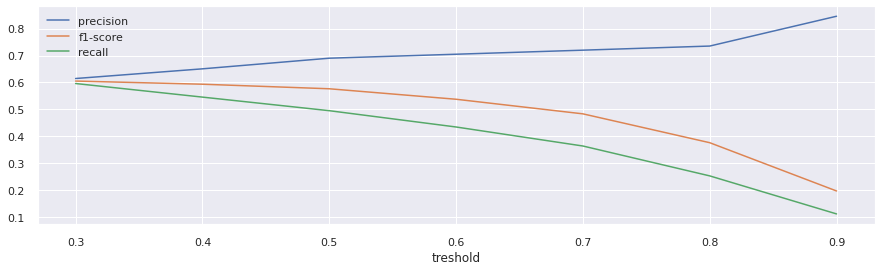

In [ ]:
#Analise de Treshold
i = []
precision = []
fs = []
recall_ = []

for x in range(3, 10):
  #predict
  ypred_lgbm = mdl_lgbm.predict(Xtest.to_numpy())
  ypred_lgbm = (mdl_lgbm.predict_proba(Xtest.to_numpy())[:,1] >= (x/10)).astype(bool)
  i.append(str(x/10))
  fs.append(f1_score(ytest, ypred_lgbm, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_lgbm, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_lgbm, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='treshold');

Mantido treshold default = 0.5 para evitar penalizar significativamente a metrica recall

### Matriz de Confusão

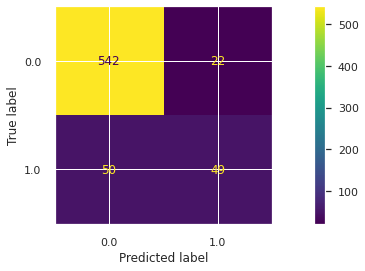

In [ ]:
plot_confusion_matrix(mdl_lgbm, Xtest.astype(np.float64), ytest.astype(np.float64))
plt.show()

### Curva ROC_AUC

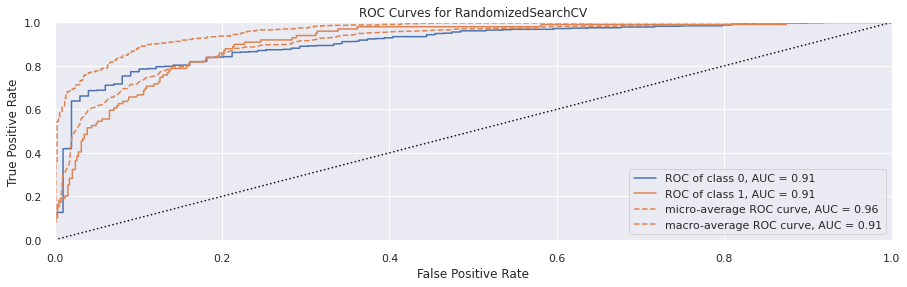

In [ ]:
visualizer = ROCAUC(mdl_lgbm, classes=[0,1])

visualizer.fit(Xtrain, ytrain)       # Fit the training data to the visualizer
visualizer.score(Xtest.astype(np.float64), ytest.astype(np.float64))        # Evaluate the model on the test data
visualizer.show();

## LGBM - Com balanceamento por SMOTE

In [ ]:
random_grid = {'num_leaves': [27, 30, 50, 80, 120, 170, 230, 300], 
               'bagging_fraction': [0.5, 0.7, 0.8, 0.9],
              'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
              'boosting_type' : ['gbdt', 'dart'],
              'bagging_freq': [3, 9, 11, 15, 17, 23, 31],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],       
              'feature_fraction': [0.5, 0.7, 0.8, 0.9],
              'lambda_l1': [0, 10, 20, 30, 40],
              'class_weight': [None]} 

lgbm = LGBMClassifier()
lgbm_tuned = RandomizedSearchCV(estimator = lgbm,
                                param_distributions = random_grid,
                                n_iter = 100, cv = 2, 
                                verbose=10, random_state=42, n_jobs = -1)
mdl_lgbm = lgbm_tuned.fit(X_res, y_res)
print(lgbm_tuned.best_params_)
ypred_lgbm = mdl_lgbm.predict(Xtest.to_numpy())

#Alimentando a tabela comparativa
mod = 'LGBM - Com Balanceamento por SMOTE - Randomized Search CV'
df_comp = append_tab(ytest, ypred_lgbm)
display(df_comp)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
{'num_leaves': 300, 'max_depth': 7, 'learning_rate': 0.3, 'lambda_l1': 0, 'feature_fraction': 0.7, 'class_weight': None, 'boosting_type': 'dart', 'bagging_freq': 3, 'bagging_fraction': 0.7}


,modelo,auc,precisao,recall
7,RFR - Com Balanceamento por SMOTE - Randomized Search CV,0.755265,0.791045,0.535354
9,LGBM - Com Balanceamento por SMOTE - Randomized Search CV,0.751719,0.746479,0.535354
5,"DT - Balanceamento SMOTE, Max_depth = 6, min_samples_leaf = 15",0.741860,0.465116,0.606061
8,LGBM - Sem Balanceamento - Randomized Search CV,0.727971,0.690141,0.494949
4,"DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 9",0.723942,0.363636,0.646465
3,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
1,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
6,RFR - Sem Balanceamento - Randomized Search CV,0.684827,0.826087,0.383838
0,"DT - Sem balanceamento, Sem pruning",0.668413,0.438776,0.434343
2,"DT - Balanceamento class_weight, Sem pruning",0.667258,0.415094,0.444444


### Treshold

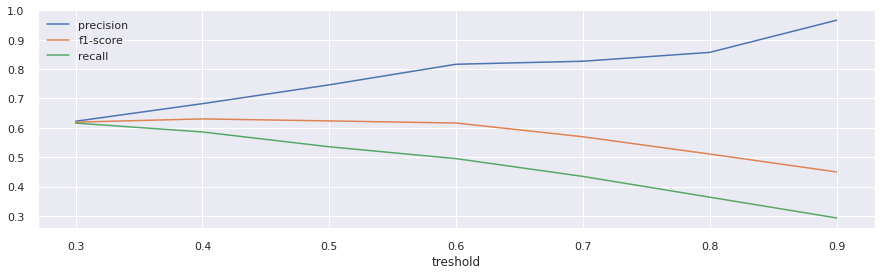

In [ ]:
#Analise de Treshold
i = []
precision = []
fs = []
recall_ = []

for x in range(3, 10):
  #predict
  ypred_lgbm = mdl_lgbm.predict(Xtest.to_numpy())
  ypred_lgbm = (mdl_lgbm.predict_proba(Xtest.to_numpy())[:,1] >= (x/10)).astype(bool)
  i.append(str(x/10))
  fs.append(f1_score(ytest, ypred_lgbm, zero_division='warn'))
  precision.append(precision_score(ytest, ypred_lgbm, zero_division='warn'))
  recall_.append(recall_score(ytest, ypred_lgbm, zero_division='warn'))

sns.set(rc={"figure.figsize":(15, 4)}) #width=8, height=4
ax = sns.lineplot(x=i,y=precision, label = 'precision')
ax = sns.lineplot(x=i,y=fs, label = 'f1-score')
ax = sns.lineplot(x=i,y=recall_, label = 'recall')
ax.set(xlabel='treshold');

### Matriz de Confusão

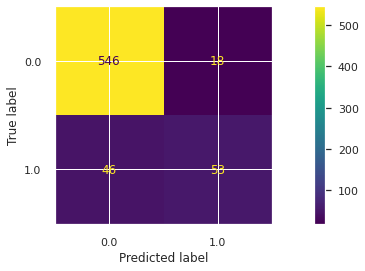

In [ ]:
plot_confusion_matrix(mdl_lgbm, Xtest.astype(np.float64), ytest.astype(np.float64))
plt.show()

### Curva ROC_AUC

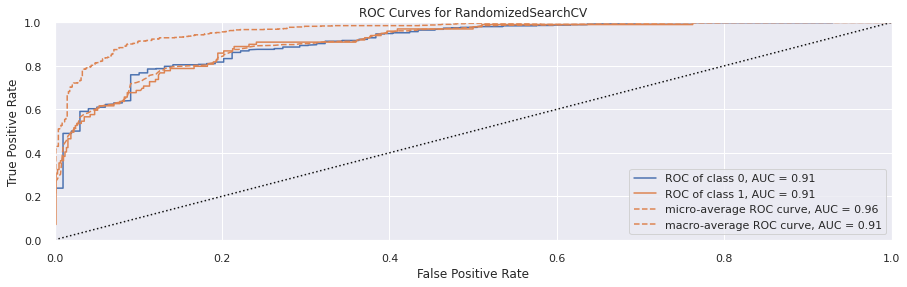

In [ ]:
visualizer = ROCAUC(mdl_lgbm, classes=[0,1])

visualizer.fit(X_res, y_res)       # Fit the training data to the visualizer
visualizer.score(Xtest.astype(np.float64), ytest.astype(np.float64))        # Evaluate the model on the test data
visualizer.show();

# MODELO VENCEDOR: 
* LGBM Com Balanceamento por SMOTE e Randomized Search CV.
A ordem dos melhores modelos pode sofrer pequenas alterações sempre que o notebook for executado por completo.

In [ ]:
display(df_comp)

,modelo,auc,precisao,recall
7,RFR - Com Balanceamento por SMOTE - Randomized Search CV,0.755265,0.791045,0.535354
9,LGBM - Com Balanceamento por SMOTE - Randomized Search CV,0.751719,0.746479,0.535354
5,"DT - Balanceamento SMOTE, Max_depth = 6, min_samples_leaf = 15",0.741860,0.465116,0.606061
8,LGBM - Sem Balanceamento - Randomized Search CV,0.727971,0.690141,0.494949
4,"DT - Balanceamento class_weight, Max_depth = 9, min_samples_leaf = 9",0.723942,0.363636,0.646465
3,"DT - Balanceamento class_weight, Max_depth = 9",0.703041,0.383562,0.565657
1,"DT - Balanceamento SMOTE, Sem pruning",0.699683,0.422764,0.525253
6,RFR - Sem Balanceamento - Randomized Search CV,0.684827,0.826087,0.383838
0,"DT - Sem balanceamento, Sem pruning",0.668413,0.438776,0.434343
2,"DT - Balanceamento class_weight, Sem pruning",0.667258,0.415094,0.444444


# Interpretabilidade dos modelos
Considerando o melhor modelo que foi o LGBM Sem Balanceamento

## Feature Importances from Sklearn

CPU times: user 1.1 s, sys: 20.5 ms, total: 1.12 s
Wall time: 623 ms


<BarContainer object of 31 artists>

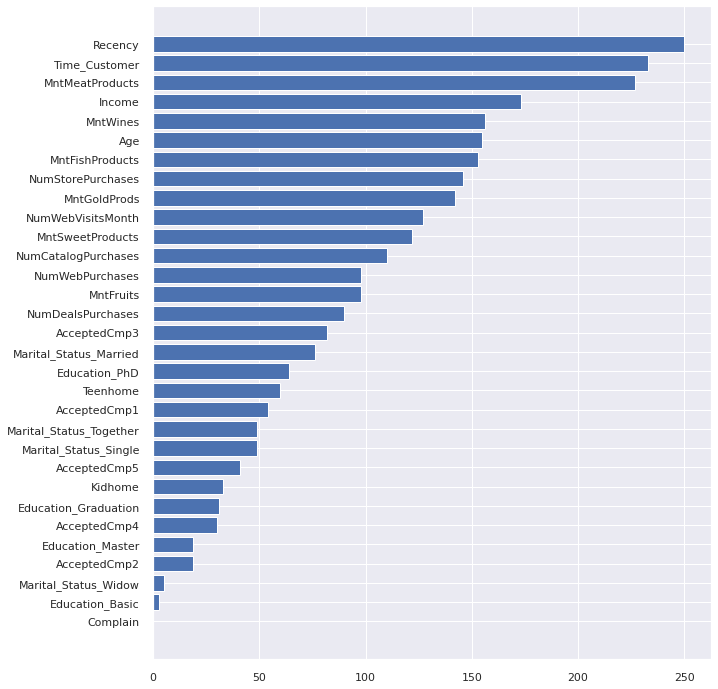

In [ ]:
%%time
lgbm = LGBMClassifier(
                      num_leaves = 30, 
                      max_depth =  11, 
                      learning_rate = 0.3,
                      lambda_l1 = 0, 
                      feature_fraction = 0.9, 
                      class_weight = 'balanced', 
                      boosting_type = 'dart',
                      bagging_freq = 17,
                      bagging_fraction = 0.9
                      )

mdl_lgbm = lgbm.fit(X_res.to_numpy(), y_res.to_numpy())
feat_importances = pd.DataFrame({'features' : X_res.columns,
                                 'importance': mdl_lgbm.feature_importances_}).sort_values('importance', ascending = True)
ypred_lgbm = mdl_lgbm.predict(Xtest.to_numpy())

plt.figure(figsize=(10,12))
plt.barh(feat_importances.features, feat_importances.importance);

## Lime

In [ ]:
%%time
#Escolha a instancia (row) a ser analisada:
row_number = 22
print(f'Row_{row_number} Predição: {ypred_lgbm[row_number]}')
print(f'Row_{row_number} Real:     {ytest.values[row_number]}')

# Instanciação do explainer
feature_names = X_res.columns
class_names = y_res.unique()
explainer = lime.lime_tabular.LimeTabularExplainer(X_res.values, feature_names = feature_names, class_names = class_names)

# Instanciação do objeto para explicação local - 'registro' que atribuímos previamente
exp = explainer.explain_instance(Xtest.iloc[row_number], mdl_lgbm.predict_proba, num_features = Xtest.shape[1], top_labels=1)

# Apresentação no notebook
exp.show_in_notebook(show_table = True, show_all = True)

#Documentação: https://lime.readthedocs.io/en/latest/

Row_22 Predição: 1.0
Row_22 Real:     1


CPU times: user 13 s, sys: 685 ms, total: 13.7 s
Wall time: 13.1 s


## Shap
https://shap-lrjball.readthedocs.io/en/latest/examples.html#tree-explainer

https://medium.com/data-hackers/o-guia-definitivo-teoria-dos-jogos-interpretando-machine-learning-bd8f7ef27c34

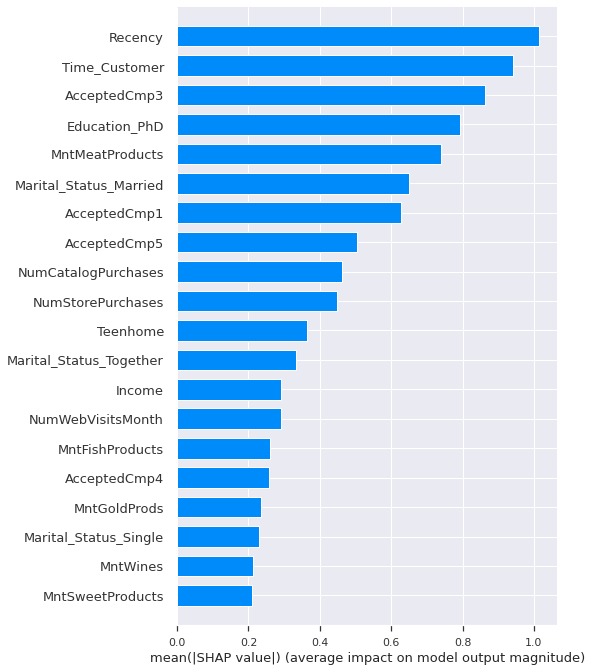

CPU times: user 4.82 s, sys: 214 ms, total: 5.04 s
Wall time: 3.92 s


In [ ]:
%%time
explainer =  shap.TreeExplainer(mdl_lgbm)
shap_values = explainer.shap_values(X_res.values)
shap.summary_plot(shap_values[1], X_res, plot_type='bar')

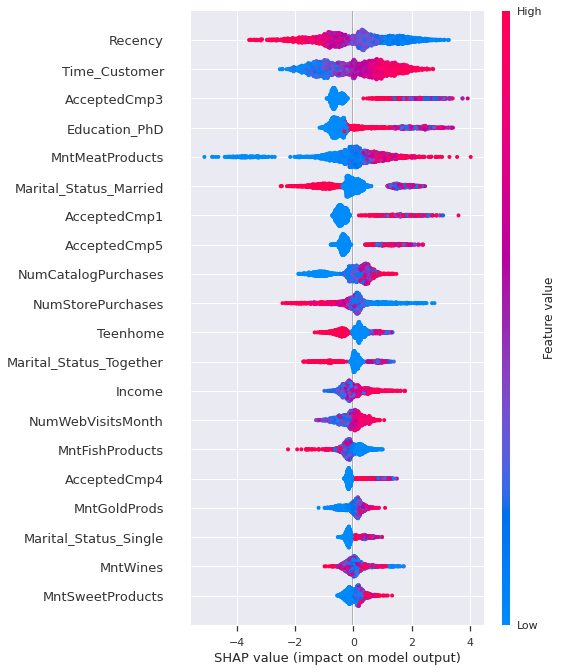

CPU times: user 5.56 s, sys: 575 ms, total: 6.13 s
Wall time: 3.52 s


In [ ]:
%%time
explainer =  shap.TreeExplainer(mdl_lgbm)
shap_values = explainer.shap_values(X_res.values)
shap.summary_plot(shap_values[1], X_res)

In [ ]:
shap.initjs()

#Escolha a instancia (row) a ser analisada:
row_n = 22

row_number = Xtest.iloc[row_n:row_n+1]
print(f'Response Predição: {ypred_lgbm[row_n:row_n+1].tolist()}')
print(f'Response Real:     {ytest[Xtest[row_n:row_n+1].index].tolist()}')

explainer =  shap.TreeExplainer(mdl_lgbm)
shap_values = explainer.shap_values(Xtest[row_n:row_n+1].values)
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:],Xtest.iloc[0,:])

Response Predição: [1.0]
Response Real:     [1]
